# Mapping the temporal and spatial dynamics of the human endometrium in vivo and in vitro

## Plotting QC metrics for Visium endometrium data

## Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scanpy as sc
import scvelo as scv
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
np.random.seed(0)

In [3]:
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80)  # low dpi (dots per inch) yields small inline figures

scanpy==1.4.4.post1 anndata==0.6.22.post1 umap==0.3.10 numpy==1.17.4 scipy==1.3.2 pandas==0.25.3 scikit-learn==0.21.3 statsmodels==0.10.1 python-igraph==0.7.1 louvain==0.6.1


### Defining paths to data

In [4]:
path = '/nfs/team292_visium_beta_phaseII/Sanger_PhaseII/new_data_20191209/Sanger_Visium_Beta_Phase_II_Manual_Align/'

# samples 152806 and 152810 are from donor A13 (Proliferative stage of the menstrual cycle)
# samples 152807 and 152811 are from donor A30 (Secretory stage of the menstrual cycle)

# sample IDs
IDs = ["152811", "152807", 
       "152810", "152806"]

In [5]:
# paths to objects
raw_matrix_paths = [path + ID + '/' + ID + '_manual_raw_feature_bc_matrix.h5' for ID in IDs]
filtered_matrix_paths = [path + ID + '/' + ID + '_manual_filtered_feature_bc_matrix.h5' for ID in IDs]

## Reading raw (all spots) and filtered (only spots under tissue) objects

In [6]:
raw_adatas = {}
filtered_adatas = {}

for i in range(len(IDs)):
    raw_adatas[IDs[i]] = sc.read_10x_h5(raw_matrix_paths[i])
    raw_adatas[IDs[i]].var_names_make_unique()
    filtered_adatas[IDs[i]] = sc.read_10x_h5(filtered_matrix_paths[i])
    filtered_adatas[IDs[i]].var_names_make_unique()

reading /nfs/team292_visium_beta_phaseII/Sanger_PhaseII/new_data_20191209/Sanger_Visium_Beta_Phase_II_Manual_Align/152811/152811_manual_raw_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:00)
reading /nfs/team292_visium_beta_phaseII/Sanger_PhaseII/new_data_20191209/Sanger_Visium_Beta_Phase_II_Manual_Align/152811/152811_manual_filtered_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:00)
reading /nfs/team292_visium_beta_phaseII/Sanger_PhaseII/new_data_20191209/Sanger_Visium_Beta_Phase_II_Manual_Align/152807/152807_manual_raw_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:01)
reading /nfs/team292_visium_beta_phaseII/Sanger_PhaseII/new_data_20191209/Sanger_Visium_Beta_Phase_II_Manual_Align/152807/152807_manual_filtered_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:00)
reading /nfs/team292_visium_beta_phaseII/Sanger_PhaseII/new_data_20191209/Sanger_Visium_Beta_Phase_II_Manual_Align/152810/152810_manual_raw_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:01)
reading /nfs/team292_visium_beta_phaseII/Sanger_PhaseII/new_data_20191209/Sanger_Visium_Beta_Phase_II_Manual_Align/152810/152810_manual_filtered_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:01)
reading /nfs/team292_visium_beta_phaseII/Sanger_PhaseII/new_data_20191209/Sanger_Visium_Beta_Phase_II_Manual_Align/152806/152806_manual_raw_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:01)
reading /nfs/team292_visium_beta_phaseII/Sanger_PhaseII/new_data_20191209/Sanger_Visium_Beta_Phase_II_Manual_Align/152806/152806_manual_filtered_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:00)


In [7]:
# adding QC metrics to the h5 objects
for ID in IDs:
    for elem in [raw_adatas, filtered_adatas]: 
        elem[ID].obs['n_counts'] = elem[ID].X.sum(1)
        elem[ID].obs['log_counts'] = np.log(elem[ID].obs['n_counts'])
        elem[ID].obs['n_genes'] = (elem[ID].X > 0).sum(1)

        mito_genes = [name for name in elem[ID].var_names if name.startswith('MT-')]
        #for each cell compute fraction of counts in mito genes vs. all genes
        #the `.A1` is only necessary, as X is sparse - it transform to a dense array after summing
        elem[ID].obs['percent_mito'] = np.sum(
            elem[ID][:, mito_genes].X, axis=1).A1 / np.sum(elem[ID].X, axis=1).A1


Trying to set attribute `.obs` of view, making a copy.
Trying to set attribute `.obs` of view, making a copy.
Trying to set attribute `.obs` of view, making a copy.
Trying to set attribute `.obs` of view, making a copy.
Trying to set attribute `.obs` of view, making a copy.
Trying to set attribute `.obs` of view, making a copy.
Trying to set attribute `.obs` of view, making a copy.
Trying to set attribute `.obs` of view, making a copy.


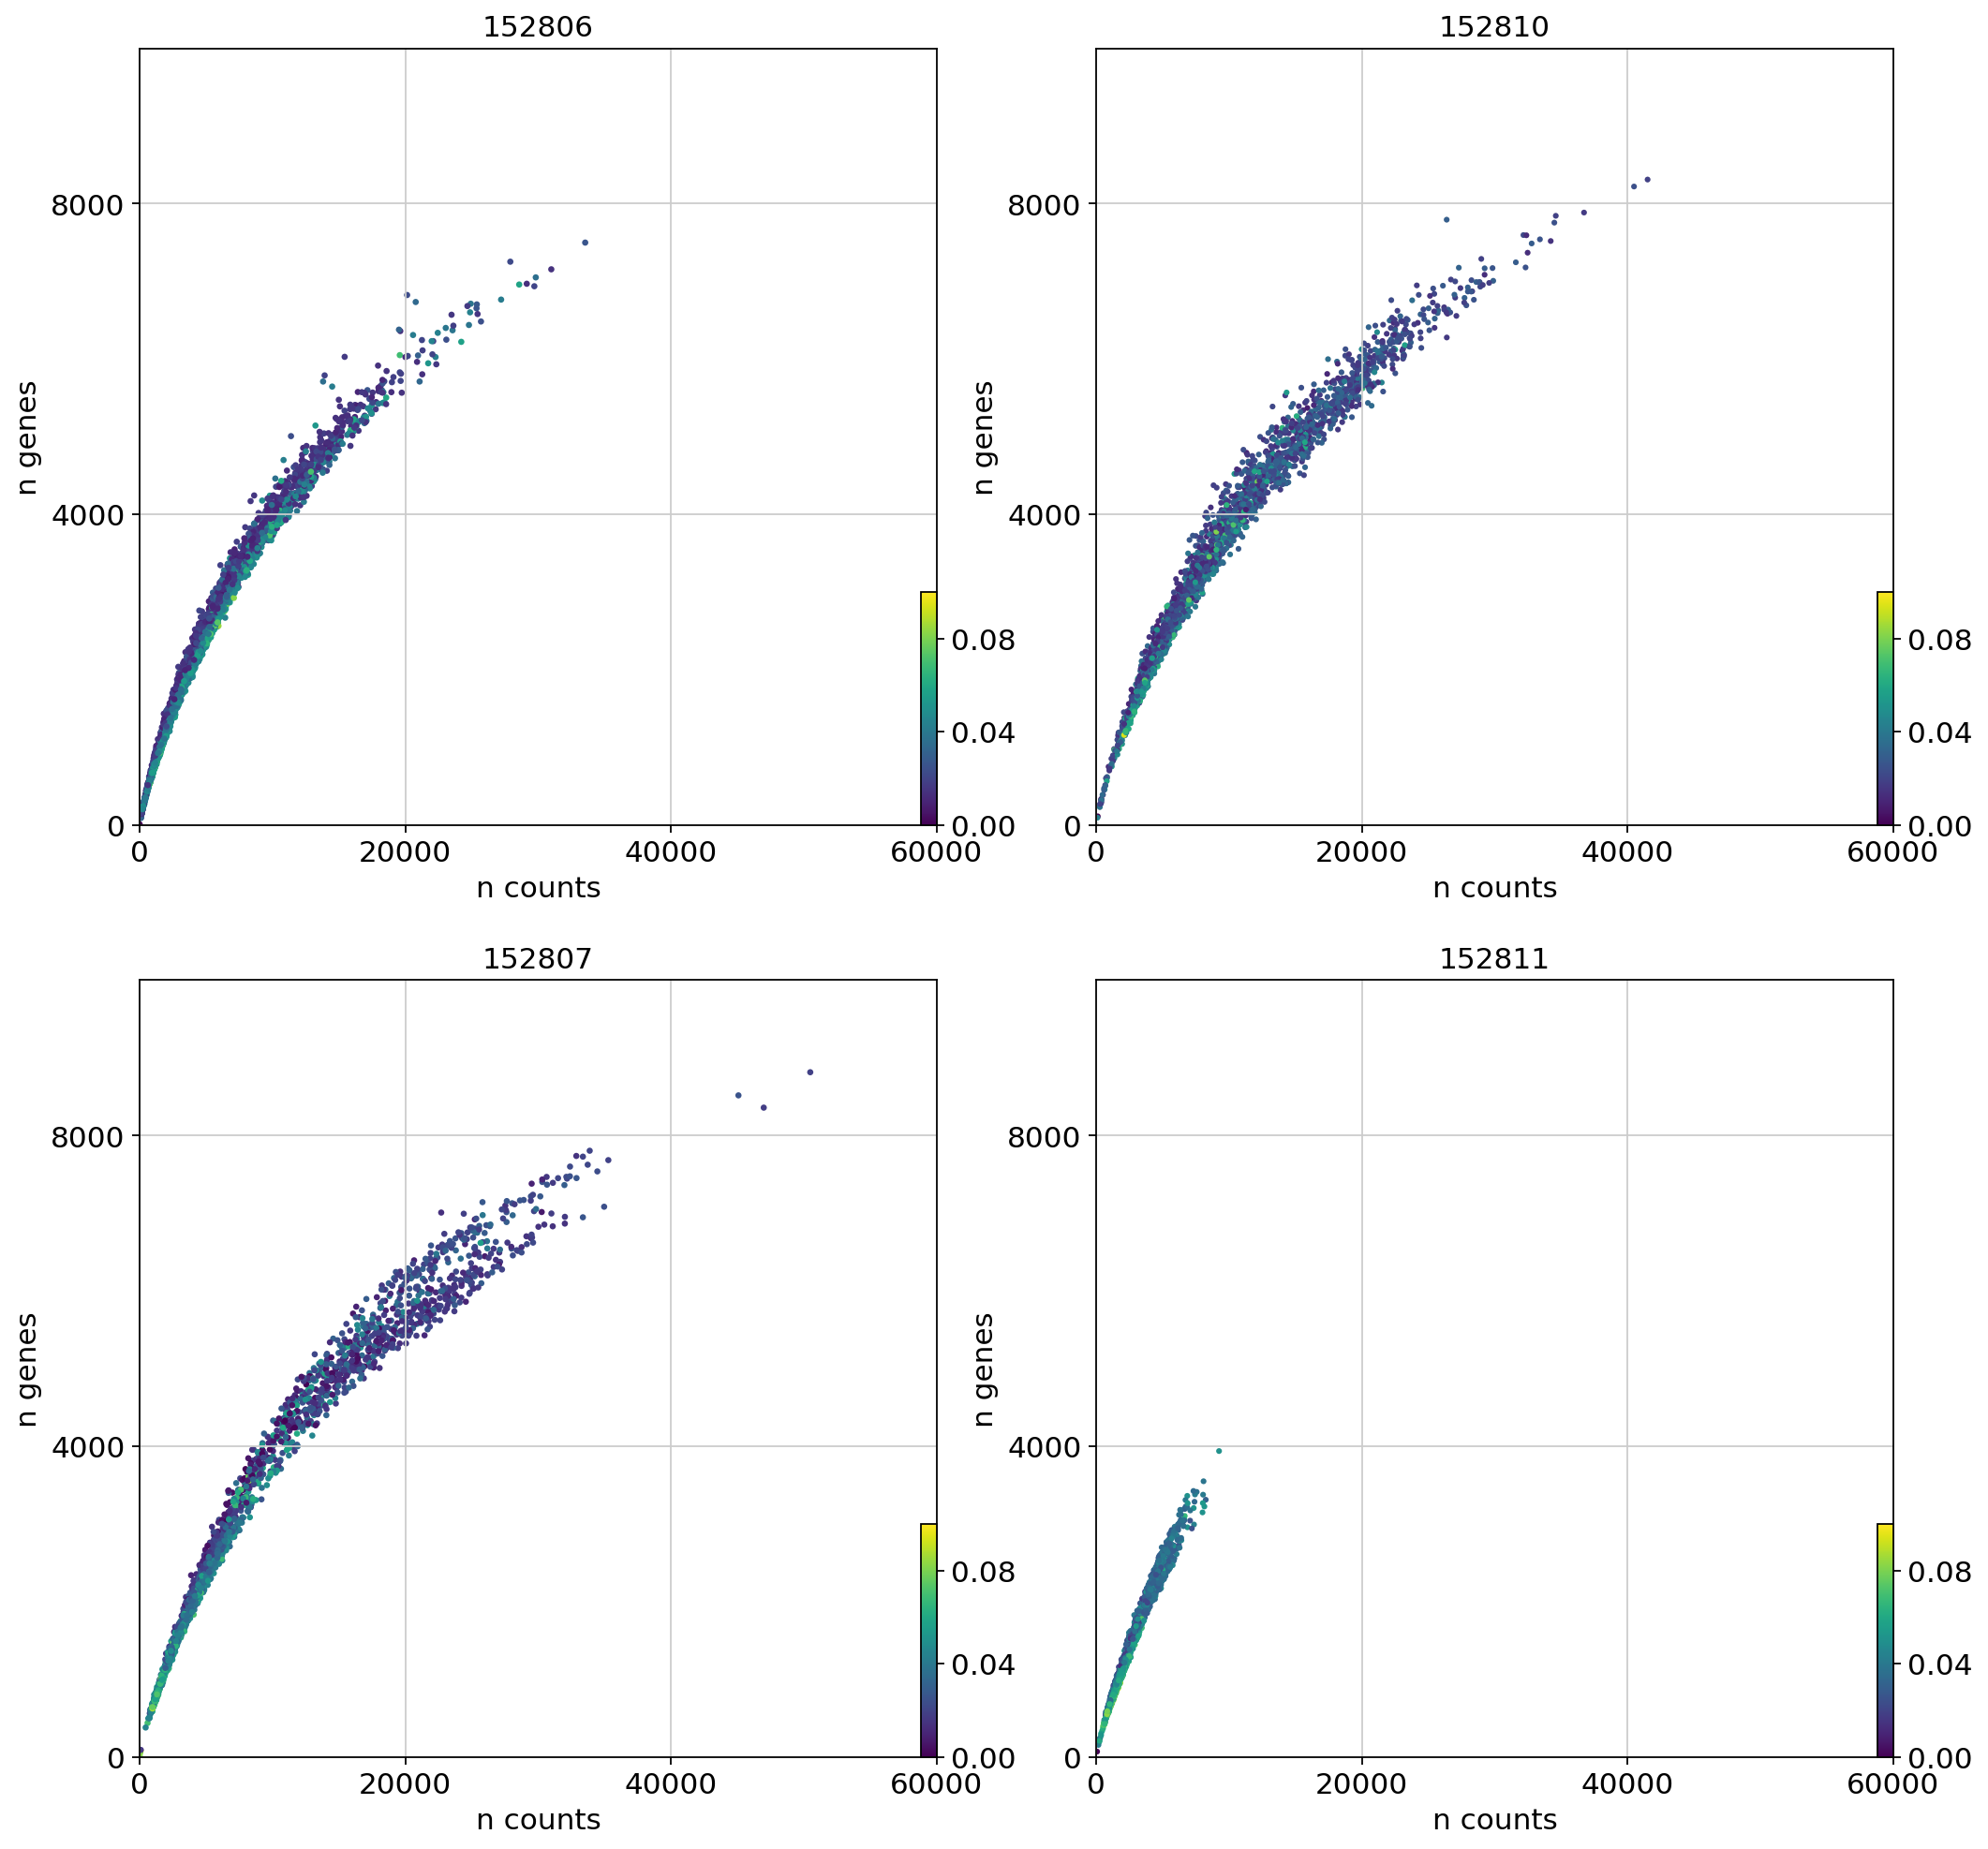

In [8]:
fig, axs = plt.subplots(2, 2)
fig.set_size_inches(15, 15)

#cax = fig.add_axes([1, 0, 0.005, 1])

#im = ax.imshow(data, cmap='gist_earth')
#fig.colorbar(im, cax=cax, orientation='vertical')

scv.pl.scatter(filtered_adatas['152806'], 'n_counts', 'n_genes', 
                          color='percent_mito', ax=axs[0, 0], show=False, rescale_color=(0,0.1))
axs[0, 0].set_title('152806')

#axs[0, 0].colorbar(visium_adatas['152806'].obs['percent_mito'])

scv.pl.scatter(filtered_adatas['152810'], 'n_counts', 'n_genes', 
                          color='percent_mito', ax=axs[0, 1], show=False, rescale_color=(0,0.1))
axs[0, 1].set_title('152810')


scv.pl.scatter(filtered_adatas['152807'], 'n_counts', 'n_genes', 
                          color='percent_mito', ax=axs[1, 0], show=False, rescale_color=(0,0.1))
axs[1, 0].set_title('152807')

scv.pl.scatter(filtered_adatas['152811'], 'n_counts', 'n_genes', 
                          color='percent_mito', ax=axs[1, 1],show=False, rescale_color=(0,0.1))
axs[1, 1].set_title('152811')

#for ax in axs.flat:
#    ax.set(xlabel='n_genes', ylabel='nUMI/n_genes')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    #ax.label_outer()
    ax.set_ylim(0,10000)
    ax.set_xlim(0,60000)
    

    
plt.show()

    
fig.savefig('Visium_endometrium_QC_genes_counts_MT.pdf')


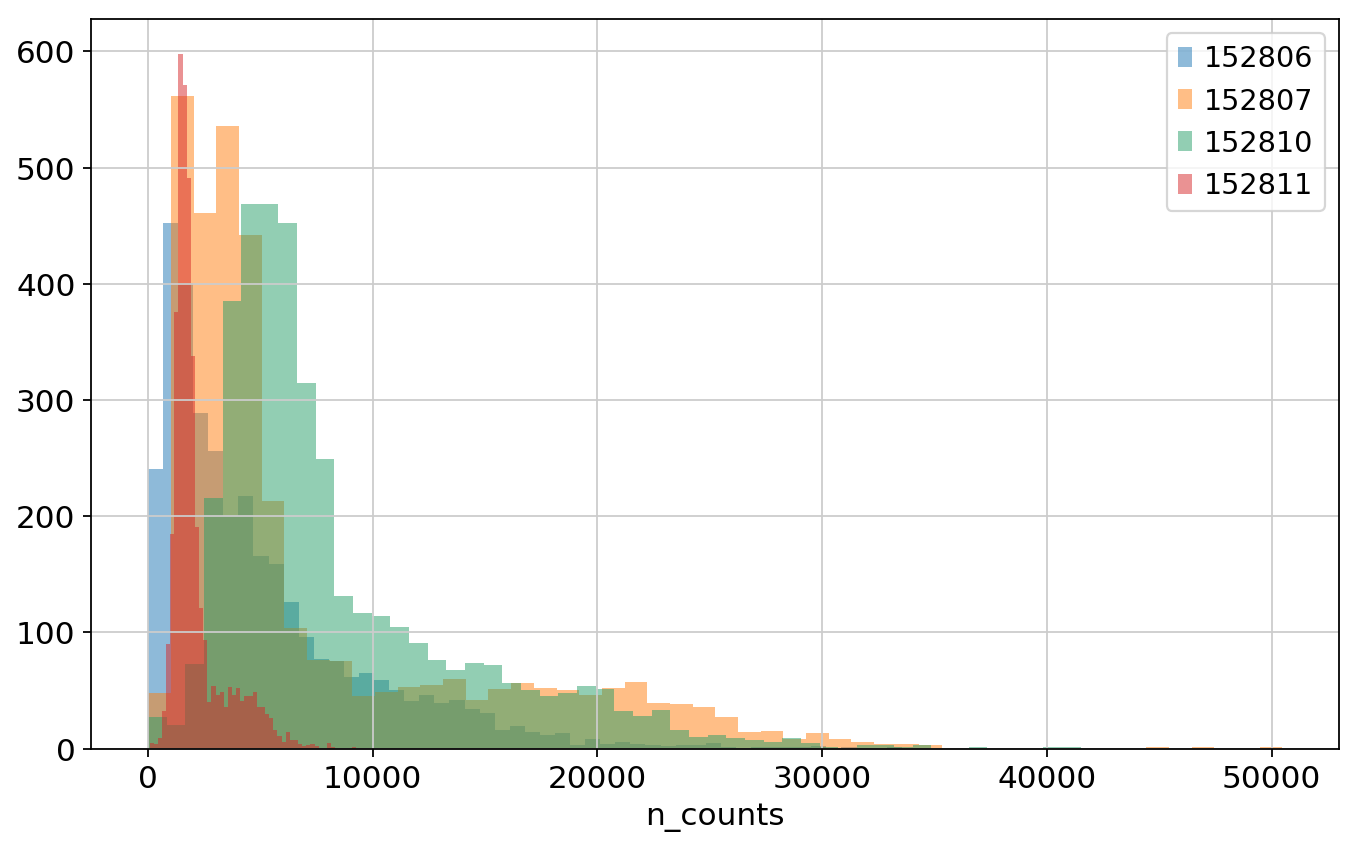

In [9]:
fig = plt.figure(figsize=(10,6))
plt.hist(filtered_adatas['152806'].obs['n_counts'], alpha=0.5, label='152806', bins=50)
plt.hist(filtered_adatas['152807'].obs['n_counts'], alpha=0.5, label='152807', bins=50)
plt.hist(filtered_adatas['152810'].obs['n_counts'], alpha=0.5, label='152810', bins=50)
plt.hist(filtered_adatas['152811'].obs['n_counts'], alpha=0.5, label='152811', bins=50)

plt.xlabel('n_counts')
plt.legend(loc='upper right')
plt.show()

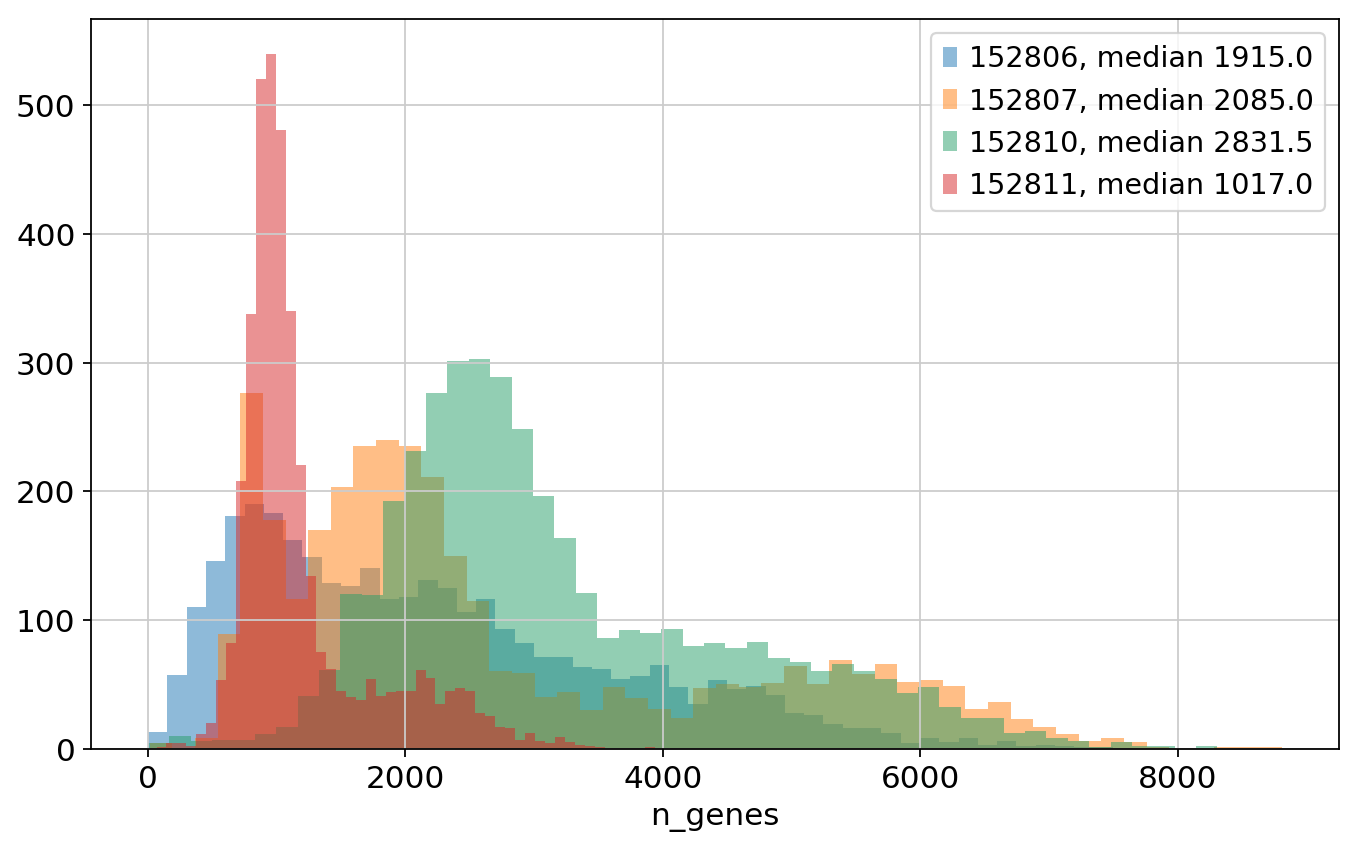

In [10]:
fig = plt.figure(figsize=(10,6))
plt.hist(filtered_adatas['152806'].obs['n_genes'], alpha=0.5, 
         label='152806, median ' + str(np.median(filtered_adatas['152806'].obs['n_genes'])), bins=50)
plt.hist(filtered_adatas['152807'].obs['n_genes'], alpha=0.5, 
         label='152807, median ' + str(np.median(filtered_adatas['152807'].obs['n_genes'])), bins=50)
plt.hist(filtered_adatas['152810'].obs['n_genes'], alpha=0.5, 
         label='152810, median ' + str(np.median(filtered_adatas['152810'].obs['n_genes'])), bins=50)
plt.hist(filtered_adatas['152811'].obs['n_genes'], alpha=0.5, 
         label='152811, median ' + str(np.median(filtered_adatas['152811'].obs['n_genes'])), bins=50)

plt.xlabel('n_genes')
plt.legend(loc='upper right')
plt.show()

fig.savefig('Visium_endometrium_QC_genes_per_sample.pdf')

plt.show()

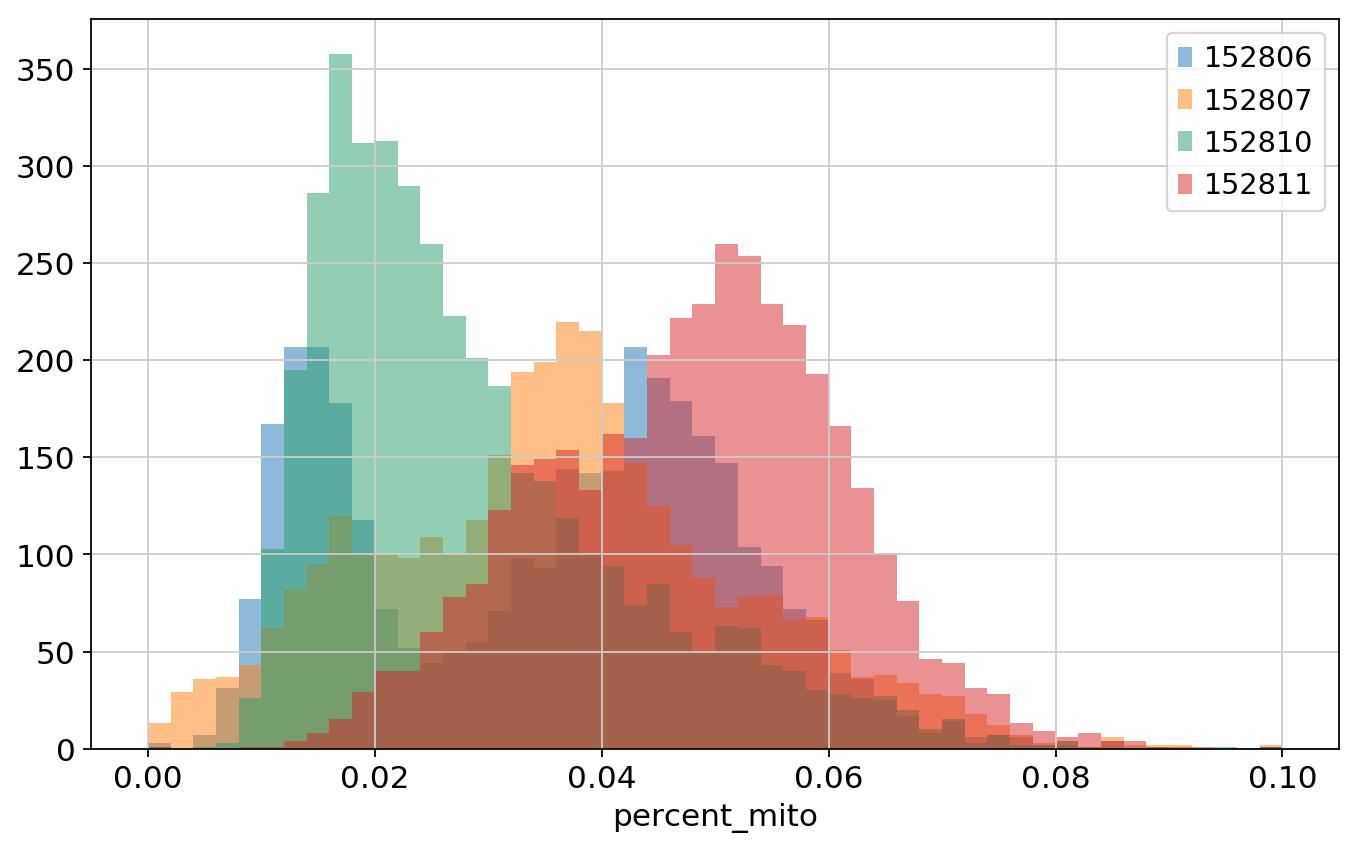

In [11]:
fig = plt.figure(figsize=(10,6))
plt.hist(filtered_adatas['152806'].obs['percent_mito'], alpha=0.5, label='152806', bins=50)
plt.hist(filtered_adatas['152807'].obs['percent_mito'], alpha=0.5, label='152807', bins=50)
plt.hist(filtered_adatas['152810'].obs['percent_mito'], alpha=0.5, label='152810', bins=50)
plt.hist(filtered_adatas['152811'].obs['percent_mito'], alpha=0.5, label='152811', bins=50)

plt.xlabel('percent_mito')
plt.legend(loc='upper right')
plt.show()